In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [92]:
#Открываем csv и смотрим, как он устроен
df = pd.read_csv('D:\\titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#наверное очень важная информация о том,какие средние значения у разных столбцов(просто скопировал команду из классной работы)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


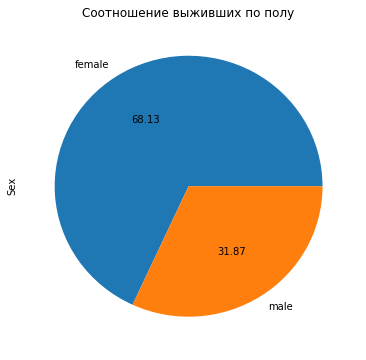

In [81]:
# Смотрим, какая статистика по выжившим мужчинам и женщинам (внутри пирога - процентное соотношение)
df_sex_survived = df.Sex[df.Survived == 1].value_counts()
df_sex_survived.plot.pie(figsize=(6,6),autopct='%.2f')
plt.title(u"Соотношение выживших по полу")
plt.show()
#Очевидно, что женщин выжило больше. Причем в два раза

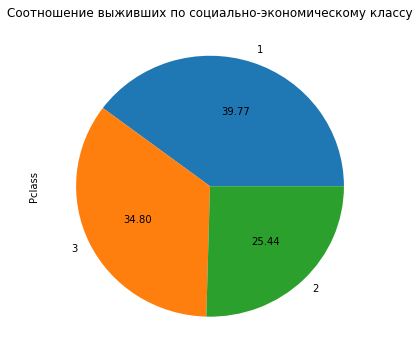

In [80]:
#теперь сравниваем по соц.-экон. классу
df_pclass_survived = df.Pclass[df.Survived == 1].value_counts()
df_pclass_survived.plot.pie(figsize=(6,6),autopct='%.2f')
plt.title("Соотношение выживших по социально-экономическому классу")
plt.show()
#первый класс самый удачливый, меньше всех повезло второму

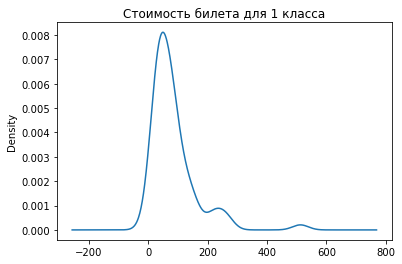

In [45]:
#сначала смотрим на стоимость билета каждого класса по отдельности.По горизонтали - стоимость билета.
#по вертикали - относительное количество людей  

df.Fare[df.Pclass == 1].plot(kind='kde')
plt.title("Стоимость билета для 1 класса")
plt.show()
#какой-то человек купил билет сильно дороже других

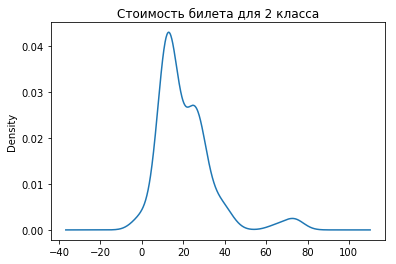

In [46]:
# Сначала хотел взять обычный barplot, но из-за количества пассажиров он показывал какой-то кошмар
df.Fare[df.Pclass == 2].plot(kind='kde')
plt.title("Стоимость билета для 2 класса")
plt.show()

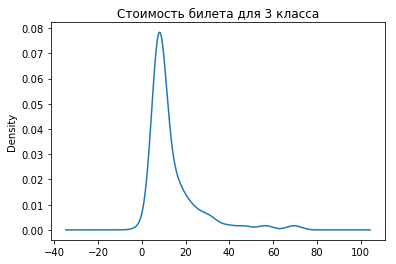

In [47]:
df.Fare[df.Pclass == 3].plot(kind='kde')
plt.title("Стоимость билета для 3 класса")
plt.show()

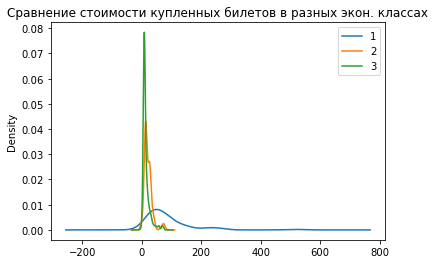

In [51]:
#все графики вместе, для наглядного сравнения (они немного сливаются, поэтому предыдущие три тоже пригодились)
df.Fare[df.Pclass == 1].plot(kind='kde')
df.Fare[df.Pclass == 2].plot(kind='kde')
df.Fare[df.Pclass == 3].plot(kind='kde')
plt.title("Сравнение стоимости купленных билетов в разных экон. классах")
plt.legend(('1','2','3'))
plt.show()
#первый класс за сколько только не покупал свои билеты. Почти весь третий класс купил свои билеты по одной цене.
#у второго класса за 22 (доллара?) билеты покупало меньше людей, чем за 24
#наверное это очевидно, но уточню: пики графиков - самая популярная цена за билет у каждого из классов

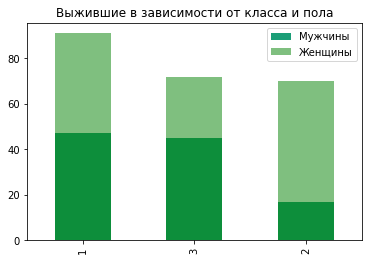

In [76]:
#Два графика, наложенных друг на друга и разбитых на три столбика. Каждый столбик - это класс
#Чем выше столбик - тем больше количество выживших
#Так как графики наложены друг на друга, то в первом классе не равное соотношение выживших, а женщин в два раза больше
df_male = df.Pclass[df.Sex == 'male'][df.Survived == 1].value_counts()
df_female = df.Pclass[df.Sex == 'female'][df.Survived == 1].value_counts()
df_male.plot(kind='bar',colormap='Dark2')
df_female.plot(kind='bar',colormap='ocean',alpha=0.5)
plt.title("Выжившие в зависимости от класса и пола")
plt.legend(('Мужчины', 'Женщины'))
plt.show()
#В первом классе выжило в два раза больше женщин; во втором классе выжило почти в 4(!) раза больше женщин;
#В третьем классе выжило на треть больше женщин; Количество выживших мужчин в первом и третьем классе одинаково
#Количество выживших мужчин во втором классе в три раза меньше, чем в остальных
#Меньше всего выжило во втором классе, в частности мужчин;Больше всего выжило людей из первого класса
#(Выживет,мужчина,1 класс)>(выживет,мужчина,2 класс)
#(Выживет,мужчина)<(выживет,женщина)

In [239]:
#####Уберем несколько столбиков, но перед этим нужно сделать новый датасет (чтобы его потом препарировать)
trainer = pd.read_csv('D:\\titanic.csv', index_col='PassengerId')
trainer.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:

def dropNcreate(data):
    data = data.drop(['Name','Parch','Ticket','Cabin','Embarked','Parch'], 1) #убираем лишнее
    
    # заменим все пустые клетки возраста и стоимости на медианы
    median_age = data['Age'].median()
    data['Age'].fillna(value=median_age, inplace=True)
    median_fare = data['Fare'].median()
    data['Fare'].fillna(value=median_fare, inplace=True)
    
    # 
    data['Youngling'] = data['Age'].apply(lambda r: 100 if r<15 else 0)  # если человеку меньше 15, он - ребенок
    data['WhoAreYou'] = data['Youngling'] + data['SibSp']   # если 101 и больше, то это ребенок с братьями/сестрами
    data['BroSis'] = data['WhoAreYou'].apply(lambda r: 1 if r>100 else 0) # если больше 101, то 1, если меньше - 0
    data['Children'] = data['Youngling'].apply(lambda r:1 if r==100 else 0) # для тренировки, класс "ребенок/не ребенок"
#я решил, что родство не так важно, если брат и сестра - женщина 40 лет и мужчина из второго класса (который самые невезучий по статистике),
#поэтому я решил уточнить и сделать класс 'BroSis', в котором будут только дети до 15 лет с родством.
#да, с фантазией у меня беда, поэтому я просто взял пример из extra :)
#и на всякий случай я сделал класс 'children', чтобы было отличие между детьми-сиблингами и просто детьми
    return data

In [241]:
#проверяю, чтобы медиана не оказалась меньше 15 (иначе все пустые клетки станут детьми и повлияют на 'Kid')
trainer['Age'].median()

28.0

In [242]:
trainer = dropNcreate(trainer)
trainer.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Youngling,WhoAreYou,BroSis,Children
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,7.2500,0,1,0,0
2,1,1,female,38.0,1,71.2833,0,1,0,0
3,1,3,female,26.0,0,7.9250,0,0,0,0
4,1,1,female,35.0,1,53.1000,0,1,0,0
5,0,3,male,35.0,0,8.0500,0,0,0,0
6,0,3,male,28.0,0,8.4583,0,0,0,0
7,0,1,male,54.0,0,51.8625,0,0,0,0
8,0,3,male,2.0,3,21.0750,100,103,1,1


In [243]:
trainer = pd.get_dummies(trainer, drop_first=True)
trainer.head(8)

,Survived,Pclass,Age,SibSp,Fare,Youngling,WhoAreYou,BroSis,Children,Sex_male
PassengerId,,,,,,,,,,
1,0,3,22.0,1,7.2500,0,1,0,0,1
2,1,1,38.0,1,71.2833,0,1,0,0,0
3,1,3,26.0,0,7.9250,0,0,0,0,0
4,1,1,35.0,1,53.1000,0,1,0,0,0
5,0,3,35.0,0,8.0500,0,0,0,0,1
6,0,3,28.0,0,8.4583,0,0,0,0,1
7,0,1,54.0,0,51.8625,0,0,0,0,1
8,0,3,2.0,3,21.0750,100,103,1,1,1


In [244]:
x_labels = ['Pclass', 'Age','Sex_male','BroSis','Children','Fare']

In [245]:
X,y=trainer[x_labels], trainer['Survived']

In [246]:
### Анализ + подбор лучших классов
selector = SelectKBest(f_classif, k=6)
selector.fit(X, y)

SelectKBest(k=6, score_func=<function f_classif at 0x0000018F22948268>)

In [247]:
scores = -np.log10(selector.pvalues_)

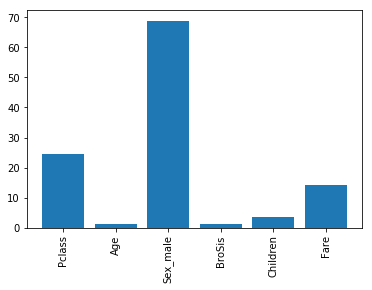

In [248]:
plt.bar(range(len(x_labels)), scores)
plt.xticks(range(len(x_labels)), x_labels, rotation='vertical')
plt.show()
#оказалось, что самыми важными классами оказались пол (очевидно), экономический класс (тоже ожидаемо) и стоимость билета (не по той же причине, что и экон. класс?)
#возраст, как ни странно, на решение почти не влияет (в частности юношество, что меня удивило. Вроде бы первыми женщин и детей пускали?)
#сначала детьми считались все, кто младше 18, но потом я опустил планку до 15, чтобы найти изменения, однако их не случилось

In [249]:
#дальше будем еще смотреть на importances
dt_clf = DecisionTreeClassifier(random_state=42)

In [250]:
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [251]:
importances = pd.Series(dt_clf.feature_importances_, index=x_labels)

In [252]:
importances

Pclass      0.125667
Age         0.219122
Sex_male    0.312740
BroSis      0.001955
Children    0.007108
Fare        0.333409
dtype: float64

In [253]:
rf_clf = RandomForestClassifier()

In [254]:
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [255]:
importances = pd.Series(rf_clf.feature_importances_, index=x_labels)

In [256]:
importances
#самый большой вес у пола, стоимости билета и возраста. Меньше всего у BroSis

Pclass      0.082921
Age         0.265681
Sex_male    0.266794
BroSis      0.005359
Children    0.015620
Fare        0.363624
dtype: float64

In [260]:
###Деление данных на тестовую/обучающую выборку + Random Forest
#убираю свой неудачный эксперимент с BroSis. Возможно стоило убрать и Children, но тогда будет слишком мало классов
x_labels = ['Pclass', 'Age','Sex_male', 'Children', 'Fare'] 
X, y = trainer[x_labels], trainer['Survived']

In [261]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

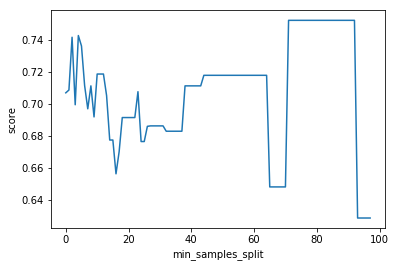

In [262]:
#Выбирает лучший параметр и рисует дерево
scores = []
for t in range(2, 100):
    dt_clf = DecisionTreeClassifier(min_samples_split=t)
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
plt.plot(scores)
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.show()

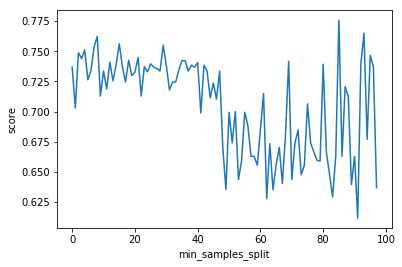

In [263]:
#то же самое: лучший параметр и дерево
scores = []
for t in range(2, 100):
    rf_clf = RandomForestClassifier(min_samples_split=t)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
plt.plot(scores)
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.show()

In [264]:
###GridSearchCV, обучение DecisionTreeClassifier и RandomForestClassifier
def grid_search_function(clf, parameters, X_train, X_test, y_train, y_test):
    gs = GridSearchCV(clf, parameters)
    gs.fit(X_train, y_train)
    print (gs.best_params_)
    y_pred = gs.predict(X_test)
    print(classification_report(y_test, y_pred))

In [265]:
dt_params = {
              'max_depth':[None, 3, 4, 5, 6, 10],
              'max_leaf_nodes':[None, 6, 8, 10, 12, 14],
              'min_samples_leaf': [3, 5, 7, 10]
             }

In [267]:
grid_search_function(DecisionTreeClassifier(random_state=42), dt_params, X_train, X_test, y_train, y_test)

{'max_depth': None, 'max_leaf_nodes': 12, 'min_samples_leaf': 3}
             precision    recall  f1-score   support

          0       0.78      0.94      0.86       157
          1       0.89      0.63      0.74       111

avg / total       0.83      0.81      0.81       268



In [272]:
rf_params = {
              'n_estimators': [50, 65, 70, 75],
              'max_depth':[None, 6, 8, 10, 12],
              'max_leaf_nodes':[None, 6, 8, 10, 12],
              'min_samples_leaf': [2, 3, 4]
             }

In [275]:
grid_search_function(RandomForestClassifier(), rf_params, X_train, X_test, y_train, y_test)

{'max_depth': 12, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'n_estimators': 65}
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       157
          1       0.84      0.71      0.77       111

avg / total       0.83      0.82      0.82       268



In [ ]:
#DecisionTreeClassifier и RandomForestClassifier работают одинаково хорошо, однако RandomForestClassifier думает намноооого дольше (у меня прошло где-то 7 минут)